In [1]:
import sys
import neal
import greedy
import tabu
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
current_path = Path().resolve()
sys.path.append(str(current_path / '../code/'))
from experiment import Experiment
from visualisation import Figure

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Load data

## Load Multiple Knapsack Problems

In [2]:
data_folder = '../data/Multidimensional Knapsack/'
# Weish dataset has smallers problebls, WEING has larger problems.
# We have Weish[01-30] files in Weish folder. Load them.
weish_files_no = 30
weish_file_paths = ['weish//Weish'+ str(i).zfill(2) +'.npz' for i in range(1, weish_files_no + 1)]
weish_loaded_files = [np.load(data_folder + i) for i in weish_file_paths]
# We have WEING[1-8] files in Weing folder. Load them.
weing_files_no = 8
weing_file_paths = ['weing//WEING'+ str(i) +'.npz' for i in range(1, weing_files_no + 1)]
weing_loaded_files = [np.load(data_folder + i) for i in weing_file_paths]
# Merge the datasets and get the needed information.
loaded_files = weish_loaded_files + weing_loaded_files
mkp_qubo_sizes = [i['n'] for i in loaded_files]
mkp_objectives = [i['objective'] for i in loaded_files]
mkp_constraints = [i['constraint'] for i in loaded_files]

## Load Quadratic Assignment Problems

In [3]:
data_folder = '../data/Quadratic Assignment Problem/'

file_names = ['had12.npz', 'had14.npz', 'had16.npz',
             'had18.npz', 'had20.npz', 'rou12.npz',
             'rou15.npz', 'rou20.npz', 'tai40a.npz',
             'tai40b.npz']

loaded_files = [np.load(data_folder + file) for file in file_names]

qap_obj_qubos = [i['cost_function_qubo'] for i in loaded_files]
qap_con_qubos = [i['constraint_function_qubo'] for i in loaded_files]

## Load Travelling Salesman Problems

We will load both small and large TSPs.

In [4]:
data_folder_s = '../data/Travelling Salesman Problem/Small/'
data_folder_l = '../data/Travelling Salesman Problem/Large/'

file_names_s = ['bayg29.npz', 'bays29.npz', 'dantzig42.npz',
                'fri26.npz', 'gr17.npz', 'gr21.npz', 'gr24.npz']
file_names_l = ['berlin52.npz', 'brazil58.npz', 'st70.npz']

loaded_files_s = [np.load(data_folder_s + file) for file in file_names_s]
loaded_files_l = [np.load(data_folder_l + file) for file in file_names_l]
loaded_files = loaded_files_s + loaded_files_l

tsp_obj_qubos = [i['cost_function_qubo'] for i in loaded_files]
tsp_con_qubos = [i['constraint_function_qubo'] for i in loaded_files]

# Prepare data

In [5]:
vl = 'Verma&Lewis'
expected = 'Expected Constraint'
lazy = 'Minimum Lazy'
check = 'Verma&Lewis check'

## MKP 

In [6]:
minimisation = False # This is a maximisation problem
_, mkp_vl_penalties, _, _, _, _ = Experiment.data_prep(mkp_qubo_sizes, mkp_objectives, mkp_constraints, vl, minimisation)
_, mkp_expected_penalties, _, _, _, _ = Experiment.data_prep(mkp_qubo_sizes, mkp_objectives, mkp_constraints, expected, minimisation)
_, mkp_lazy_penalties, _, _, _, _ = Experiment.data_prep(mkp_qubo_sizes, mkp_objectives, mkp_constraints, lazy, minimisation)
_, mkp_check_penalties, _, _, _, _ = Experiment.data_prep(mkp_qubo_sizes, mkp_objectives, mkp_constraints, check, minimisation)

## QAP

In [7]:
minimisation = True # This is a minimisation problem
_, qap_vl_penalties = Experiment.data_prep_light(qap_obj_qubos, qap_con_qubos, vl, minimisation)
_, qap_expected_penalties = Experiment.data_prep_light(qap_obj_qubos, qap_con_qubos, expected, minimisation)
_, qap_lazy_penalties = Experiment.data_prep_light(qap_obj_qubos, qap_con_qubos, lazy, minimisation)
_, qap_check_penalties = Experiment.data_prep_light(qap_obj_qubos, qap_con_qubos, check, minimisation)

## TSP

In [8]:
minimisation = True # This is a minimisation problem
_, tsp_vl_penalties = Experiment.data_prep_light(tsp_obj_qubos, tsp_con_qubos, vl, minimisation)
_, tsp_expected_penalties = Experiment.data_prep_light(tsp_obj_qubos, tsp_con_qubos, expected, minimisation)
_, tsp_lazy_penalties = Experiment.data_prep_light(tsp_obj_qubos, tsp_con_qubos, lazy, minimisation)
_, tsp_check_penalties = Experiment.data_prep_light(tsp_obj_qubos, tsp_con_qubos, check, minimisation)

In [9]:
tsp_vl_penalties

[12353, 16945, 9877, 9446, 15329, 21685, 10127, 109810, 571102, 10055]

In [10]:
tsp_check_penalties

[6177, 8473, 4939, 4723, 7665, 10843, 5064, 54905, 285551, 5028]

# Plot!

<Figure size 2400x800 with 0 Axes>

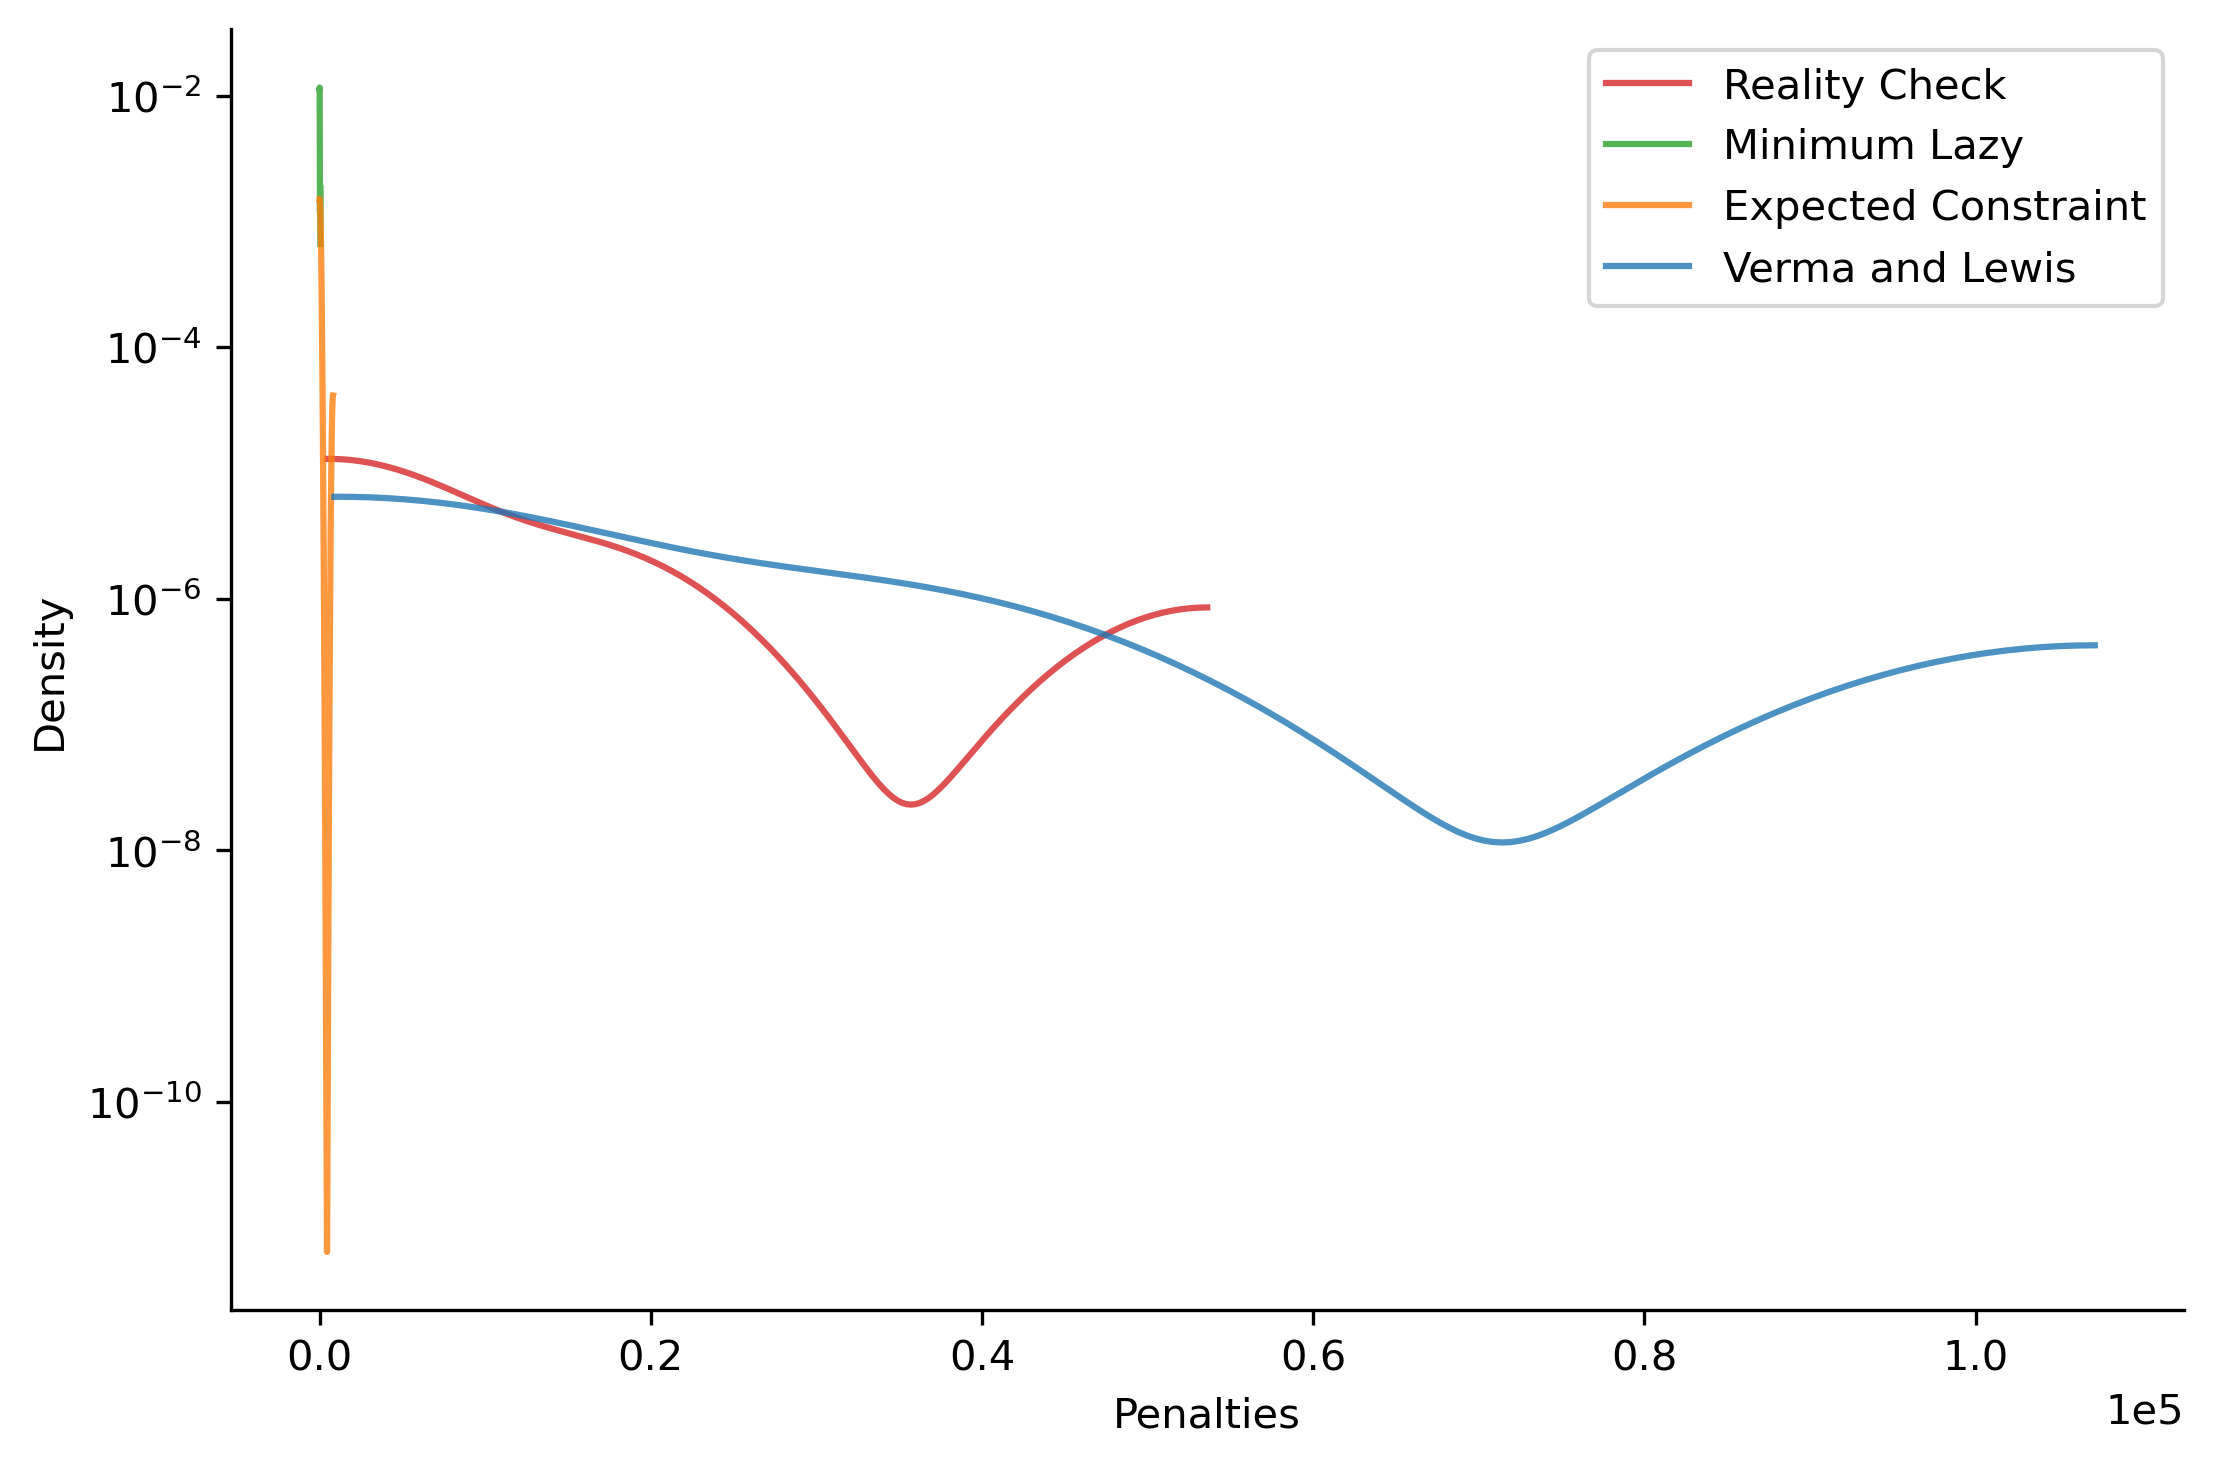

In [11]:
Figure.penalty_distribution(mkp_vl_penalties, 
                            mkp_expected_penalties, 
                            mkp_lazy_penalties, 
                            mkp_check_penalties)

<Figure size 2400x800 with 0 Axes>

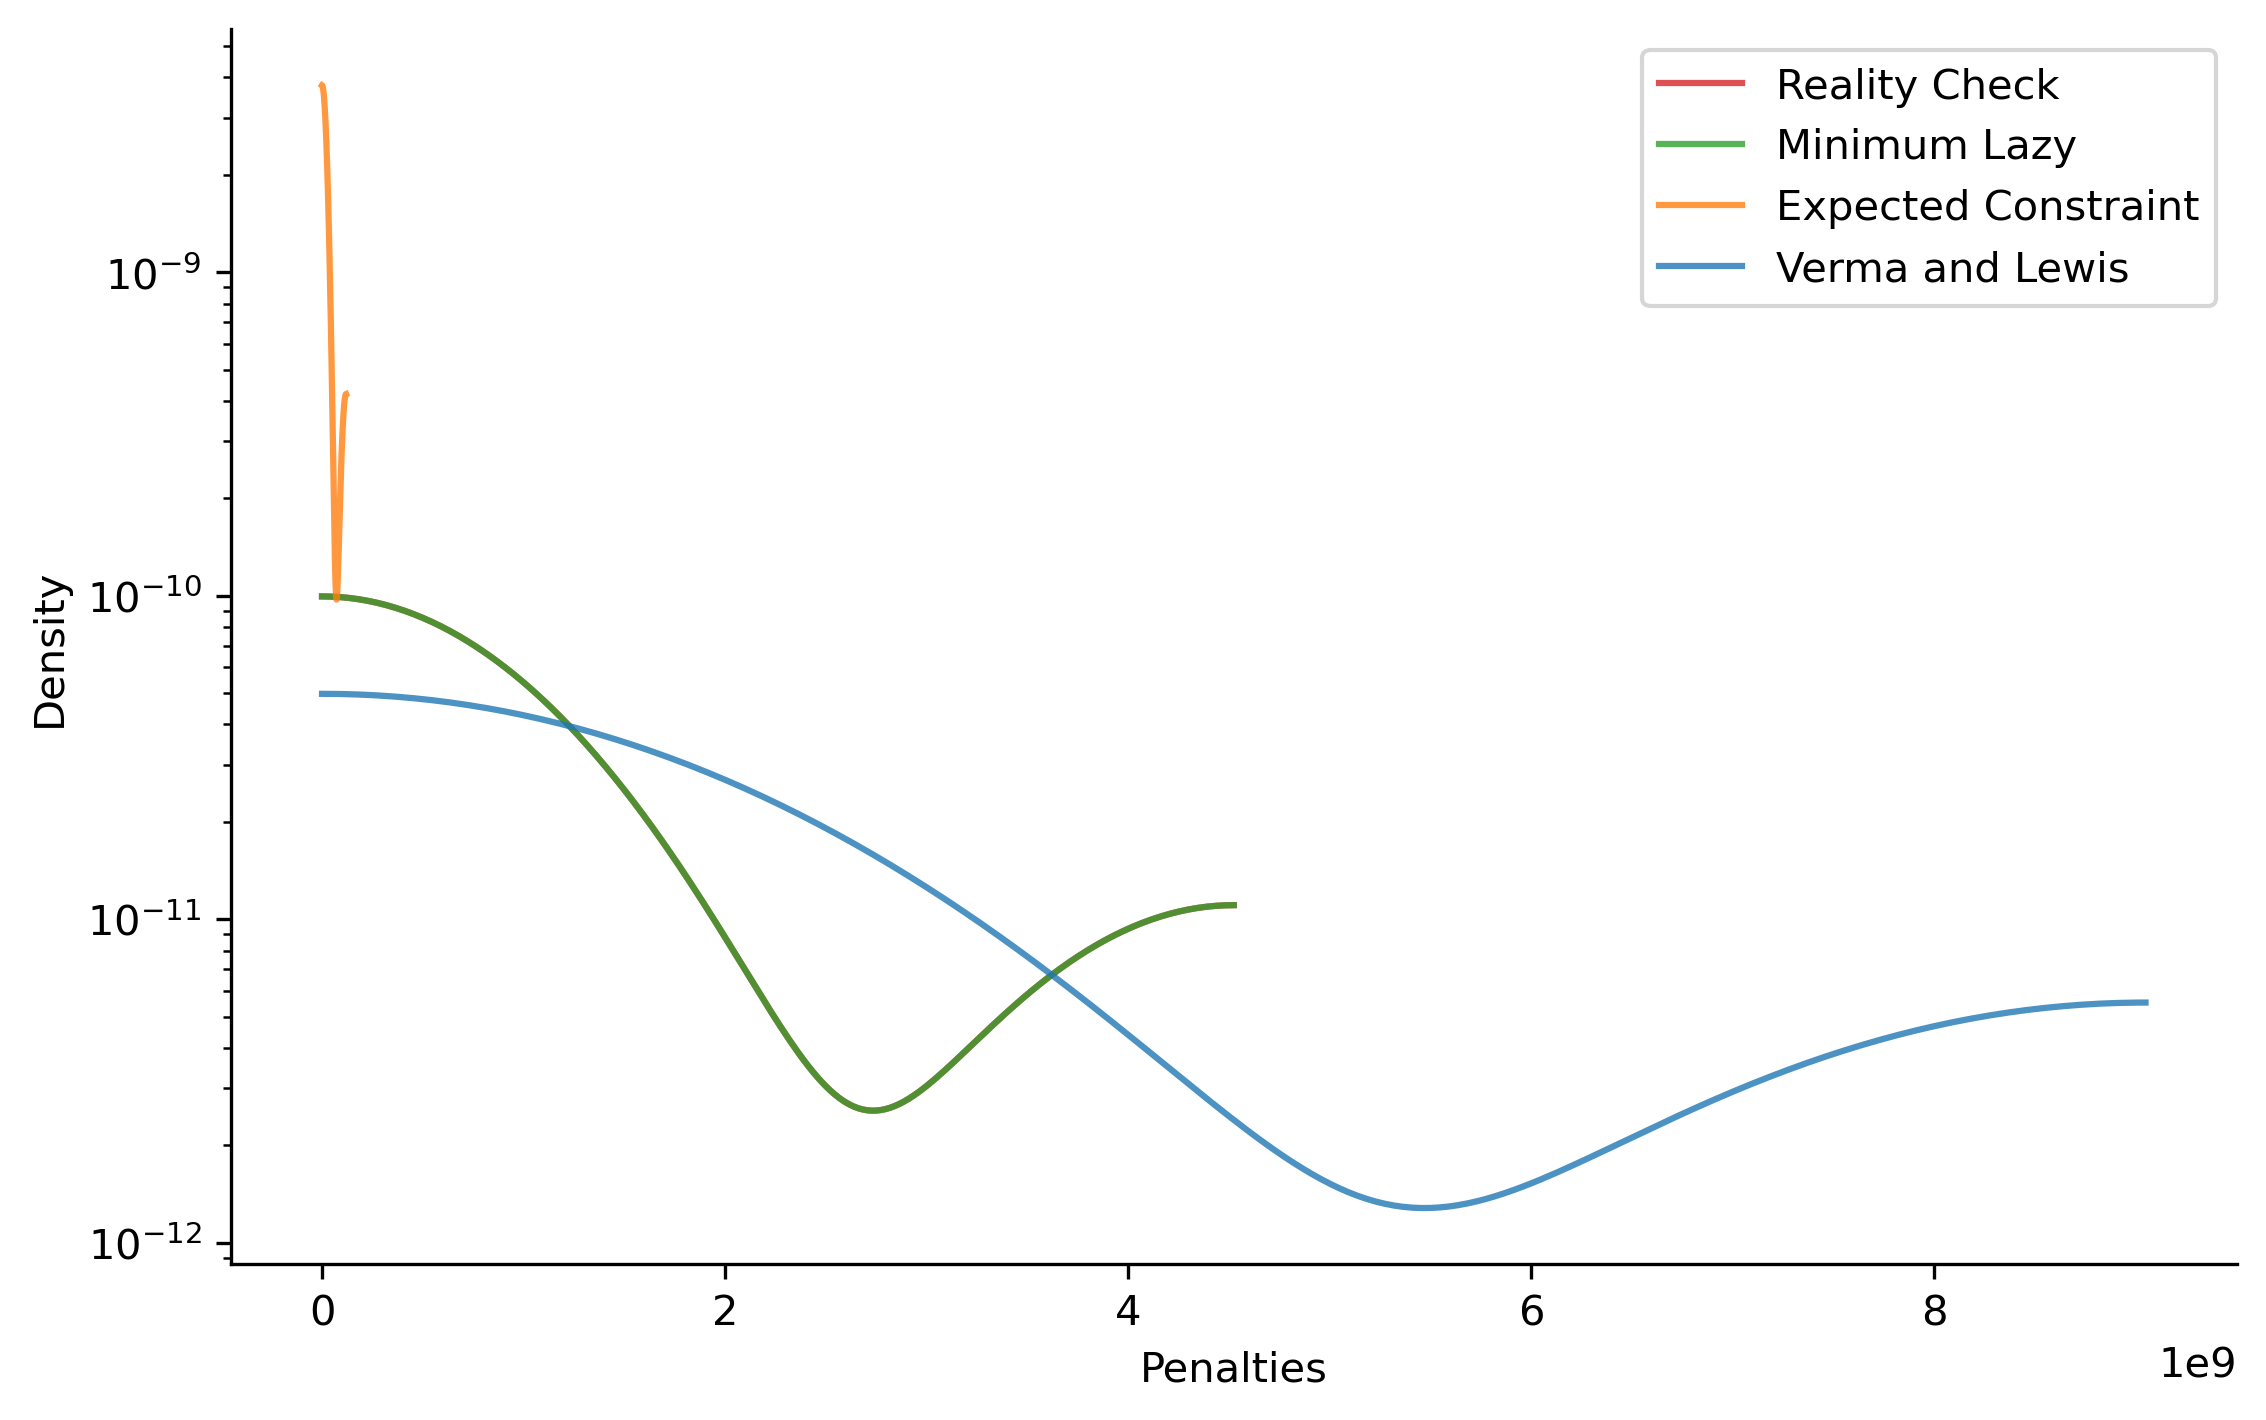

In [12]:
Figure.penalty_distribution(qap_vl_penalties, 
                            qap_expected_penalties, 
                            qap_lazy_penalties, 
                            qap_check_penalties)

<Figure size 2400x800 with 0 Axes>

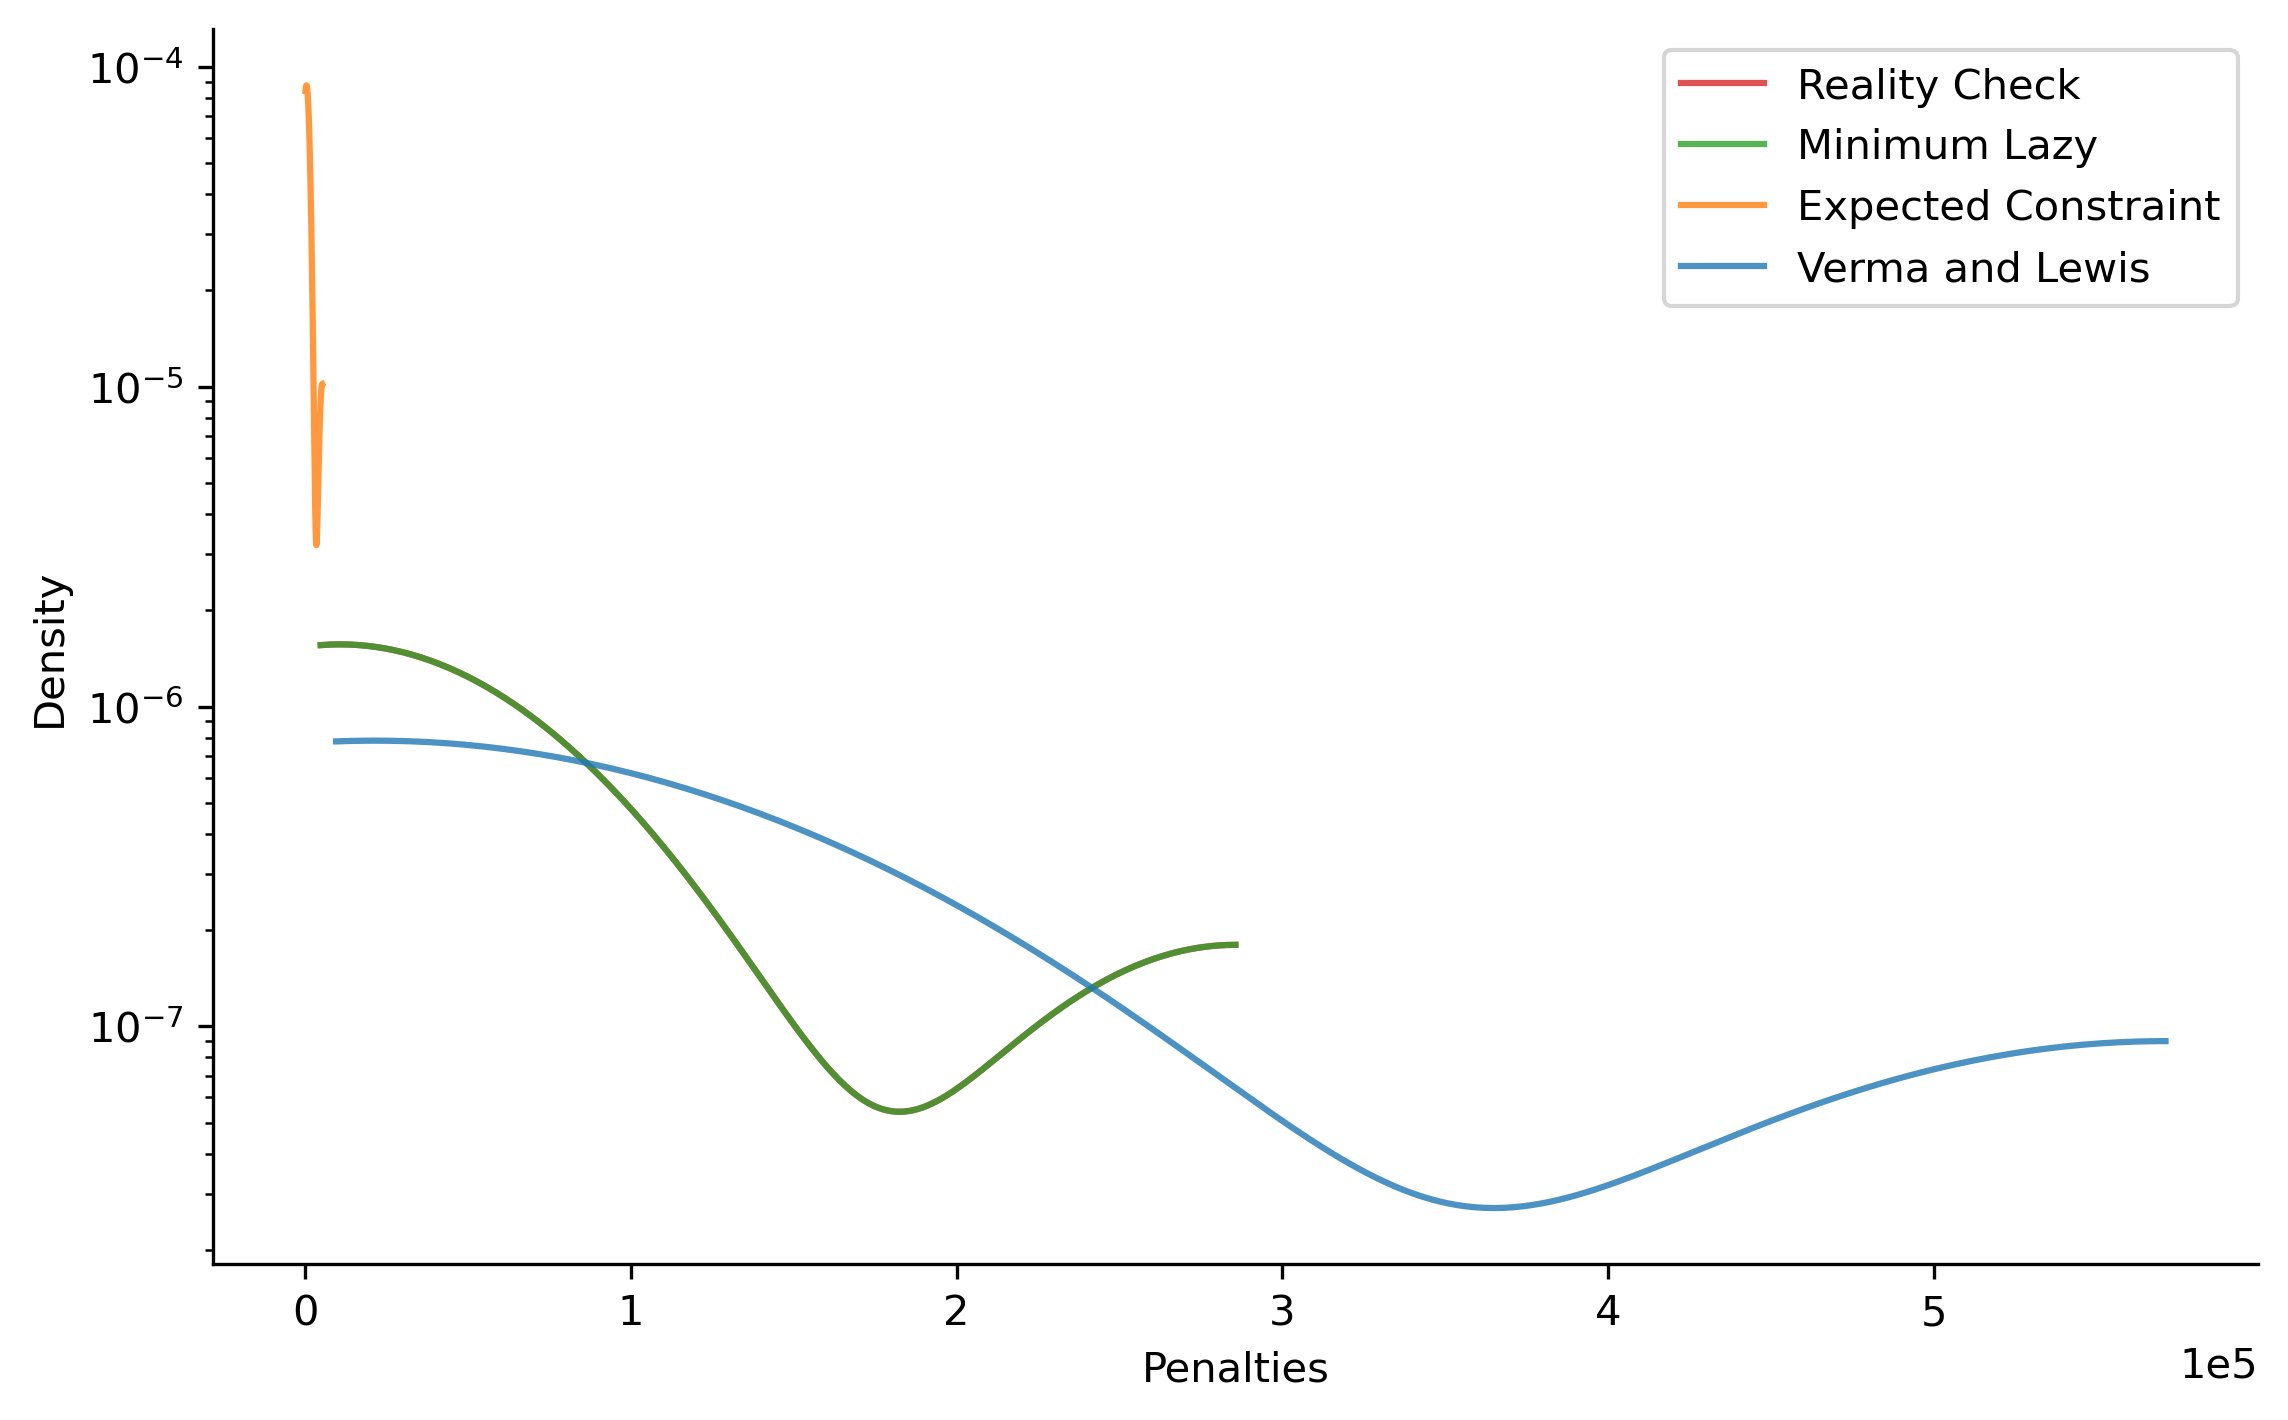

In [13]:
Figure.penalty_distribution(tsp_vl_penalties, 
                            tsp_expected_penalties, 
                            tsp_lazy_penalties, 
                            tsp_check_penalties)

Let's have a look at ML and EC on MKP

<Figure size 2400x800 with 0 Axes>

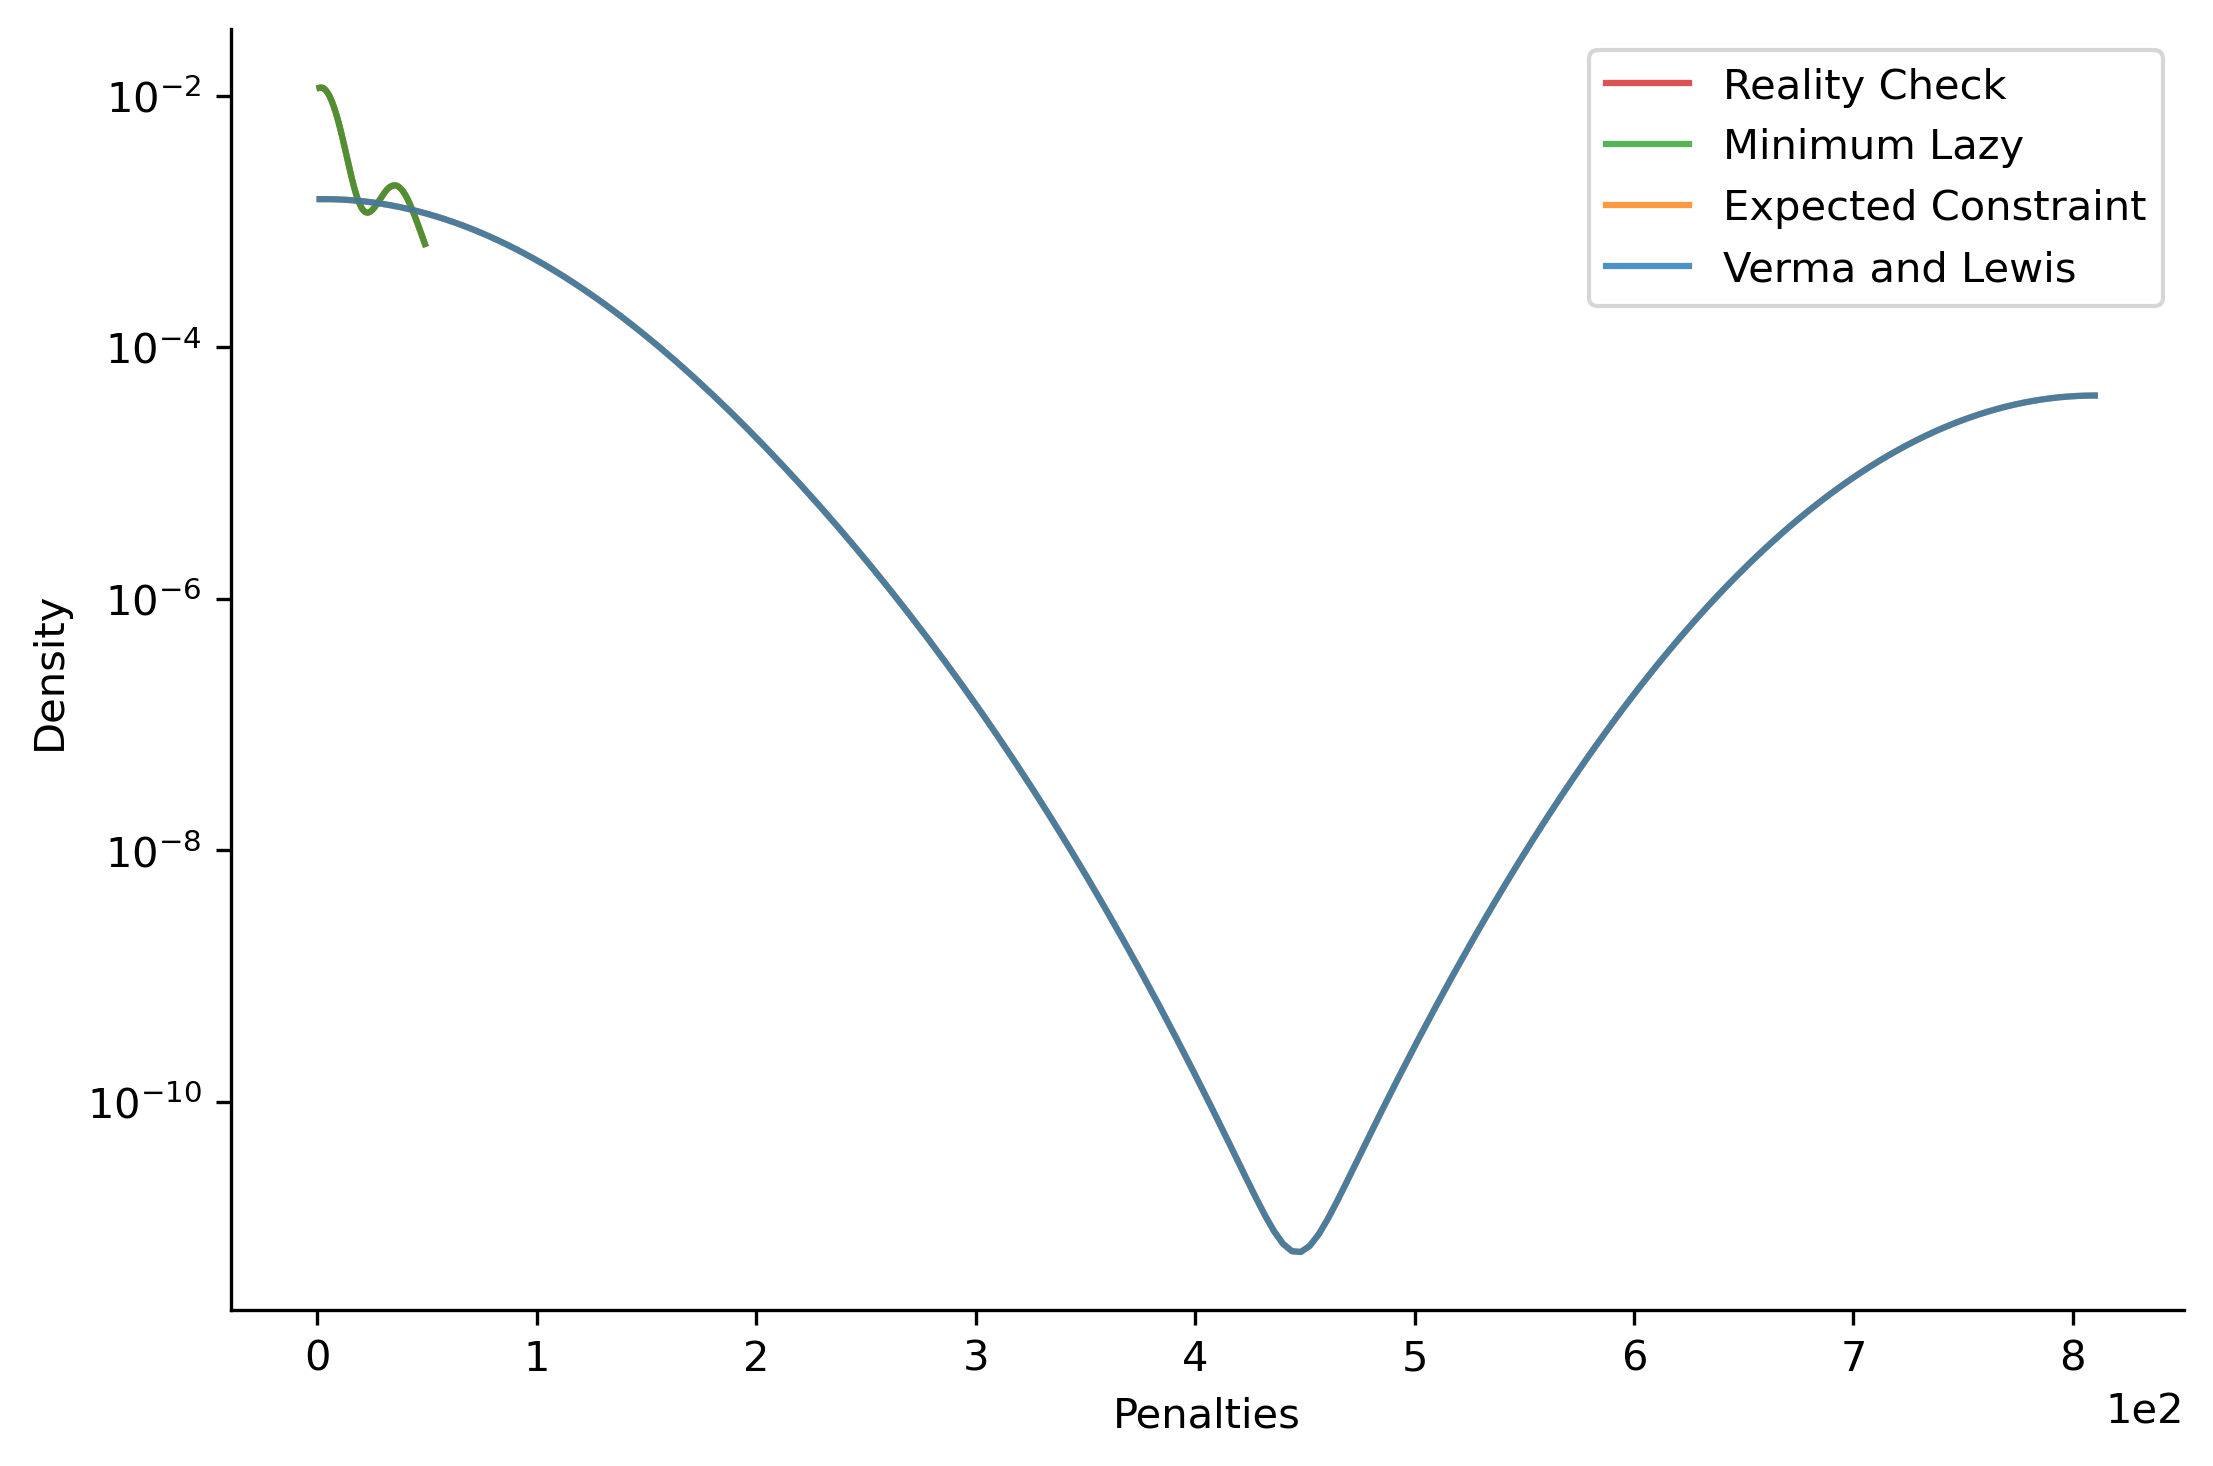

In [16]:
Figure.penalty_distribution(mkp_expected_penalties, 
                            mkp_expected_penalties, 
                            mkp_lazy_penalties, 
                            mkp_lazy_penalties)